# Live Code 2
## Introduction
- Name: Izzan Dienurrahman
- Batch: HCK-003

## Objective
- Membuat model machine learning untuk memprediksi kemungkinan seseorang terkena serangan jantung.

## Problem Statements
- Meload dataset 
- Mengidentifikasi fitur/kolom yang kiranya berkaitan terhadap `heart_attack`.
- Mengidentifikasi distribusi kolom-kolom pada dataset
- Menghandle missing value dan outlier
- Membuat pipeline untuk preprocessing dan training
- Mengevaluasi model
- Tuning hyperparameter model
- Mengevaluasi ulang model
- Menyimpan model

## Dataset Desciription

Dataset Name : `heart-attack-possibility.csv`

| Column | Description |
| --- | --- |
| `age` | Age of the patient (in years) |
| `sex` | Sex of the patient |
| `cp` | Chest Pain Type <br><br> `0` = Typical angina <br> `1` = Atypical angina <br> `2` = Non-anginal pain <br> `3` = Asymptomatic |
| `trestbps` | Resting blood pressure (in mm Hg on admission to the hospital |
| `chol` | Serum cholesterol (in mg/dl) |
| `fbs` | Is fasting blood sugar > 120 mg/dl ? <br><br> `1` = Yes <br> `0` = No |
| `restecg` | Resting electrocardiographic results <br><br> `0` = Normal <br> `1` = Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br> `2` = Showing probable or definite left ventricular hypertrophy by Estes' criteria |
| `thalach` | Maximum heart rate achieved  |
| `exang` | Exercise induced angina <br><br> `1` = Yes <br> `0` = No |
| `oldpeak` | ST depression induced by exercise relative to rest |
| `slope` | The Slope of the Peak Exercise ST Segment |
| `ca` | Number of Major Vessels (0-3) Colored by Flourosopy |
| `thal` | Thallium Stress Test Result  |
| `target` | Diagnosis of Heart Disease <br><br> `1` : Heart attack = Yes <br> `0` : Heart attack = No |

---


## Import Library

In [1]:
# import library yang dibutuhkan
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix
import pandas as pd
import numpy  as np
import seaborn as sns; sns.set()
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score
import warnings
warnings.filterwarnings("ignore")

## Data Loading

In [2]:
# set max display column
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_csv('heart-attack-possibility.csv') # read csv insurance

In [4]:
df.head() # menampilkan 10 data teratas

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,1,0,150,0,2.3,Downsloping,0.0,Fixed defect,1
1,37,Male,2,130,250,0,1,187,0,3.5,Downsloping,0.0,Normal,1
2,41,Female,1,130,204,0,0,172,0,1.4,Upsloping,0.0,Normal,1
3,56,Male,1,120,236,0,1,178,0,0.8,Upsloping,0.0,Normal,1
4,57,Female,0,120,354,0,1,163,1,0.6,Upsloping,0.0,Normal,1


In [5]:
df.tail() # menampilkan 10 data terbawah

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,Female,0,140,241,0,1,123,1,0.2,Flat,0.0,Reversible defect,0
299,45,Male,3,110,264,0,1,132,0,1.2,Flat,0.0,Reversible defect,0
300,68,Male,0,144,193,1,1,141,0,3.4,Flat,2.0,Reversible defect,0
301,57,Male,0,130,131,0,1,115,1,1.2,Flat,1.0,Reversible defect,0
302,57,Female,1,130,236,0,0,174,0,0.0,Flat,1.0,Normal,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        298 non-null    float64
 12  thal      301 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


Terdapat 303 entri data, terdapat standard missing values pada kolom ca dan thal. Untuk type data ada yang sudah dalam bentuk encoded form ada yang belum atau masih kategorical string seperti `sex`, `slope`, dan `thal`

In [7]:
df.isnull().sum() # menampilkan standar missing value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

Terdapat 5 missing values pada `ca` dan 2 missing values pada `thal` nilai ini relatif kecil sekitar 1.65% dari data keseluruhan, maka missing entry  akan di trim.

In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

0

Terdapat 1 entri data duplikat

In [10]:
# drop data duplikat
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

Data duplikat sudah tiada.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       296 non-null    int64  
 1   sex       296 non-null    object 
 2   cp        296 non-null    int64  
 3   trestbps  296 non-null    int64  
 4   chol      296 non-null    int64  
 5   fbs       296 non-null    int64  
 6   restecg   296 non-null    int64  
 7   thalach   296 non-null    int64  
 8   exang     296 non-null    int64  
 9   oldpeak   296 non-null    float64
 10  slope     296 non-null    object 
 11  ca        296 non-null    float64
 12  thal      296 non-null    object 
 13  target    296 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 34.7+ KB


Entri data tanpa duplikat dan missing value sejumlah 2964 baris.

# Exploratory Data Analysis (EDA)

In [13]:
# menampilkan informasi deskriptif kolom data numerik
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target
count,296.000000,296.000000,296.00000,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,0.959459,131.60473,247.155405,0.14527,0.523649,149.560811,0.327703,1.059122,0.679054,0.540541
std,9.059471,1.034184,17.72662,51.977011,0.35297,0.526692,22.970792,0.470171,1.166474,0.939726,0.499198
min,29.000000,0.000000,94.00000,126.000000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.00000,211.000000,0.00000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.00000,242.500000,0.00000,1.000000,152.500000,0.000000,0.800000,0.000000,1.000000
75%,61.000000,2.000000,140.00000,275.250000,0.00000,1.000000,166.000000,1.000000,1.650000,1.000000,1.000000
max,77.000000,3.000000,200.00000,564.000000,1.00000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


kolom `age`, `cp`, dan `trestbps` sekilas terlihat memiliki sebaran data normal. Umur maksimal yang tercatat pada data yaitu 77 tahun dan minimal 29 tahun.

In [14]:
num_col = df.select_dtypes('number').columns.to_list()
len(num_col)

11

In [15]:
cat_col = df.select_dtypes('object').columns.to_list()
len(cat_col)

3

Terdapat 14 kolom pada dataset, dimana 11 kolomnya bertipe numerik (baik categorical yang sudah di encode maupun belum) dan 3 kolom lainnya bertipe object atau kategorical string.

In [16]:
df.target.unique()

array([1, 0])

Data `target` (heart attack) memiliki 2 unique values, True dan False.

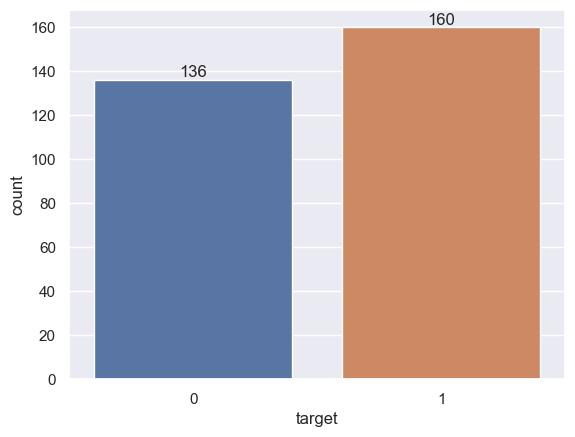

In [17]:
ax = sns.countplot(x=df.target, data=df)
ax.bar_label(ax.containers[0])
plt.show()

Terlihat bahwa dataset memiliki kelas yang relatif cukup seimbang, dimana target `label 0` berjumlah `136` sedangkan target `label 1` memiliki jumlah `160`.

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,1,0,150,0,2.3,Downsloping,0.0,Fixed defect,1
1,37,Male,2,130,250,0,1,187,0,3.5,Downsloping,0.0,Normal,1
2,41,Female,1,130,204,0,0,172,0,1.4,Upsloping,0.0,Normal,1
3,56,Male,1,120,236,0,1,178,0,0.8,Upsloping,0.0,Normal,1
4,57,Female,0,120,354,0,1,163,1,0.6,Upsloping,0.0,Normal,1


Melihat informasi kesehatan pasien dari tingkat kolesterolnya

In [19]:
# jumlah pasien healthy
healthy = df.chol[df.chol<200].count()
print(f'Jumlah pasien tergolong healthy ada {healthy} orang.')

Jumlah pasien tergolong healthy ada 48 orang.


In [20]:
# jumlah pasien at risk
at_risk = df.chol[(df.chol>=200) & (df.chol<=240)].count()
print(f'Jumlah pasien tergolong at risk ada {at_risk} orang.')

Jumlah pasien tergolong at risk ada 98 orang.


In [21]:
# jumlah pasien dangerous
dangerous = df.chol[df.chol>=240].count()
print(f'Jumlah pasien tergolong dangerous ada {dangerous} orang.')

Jumlah pasien tergolong dangerous ada 154 orang.


Membuat kolom maksimum denyut jantung pasien

In [22]:
# membuat kolom max_heart_rate dengan formula sbg berikut
df['max_heart_rate'] = 220 - df.age

Membandingkan `thalach` dan `max_heart_rate` dengan kemungkinan seseorang terkena serangan jantung

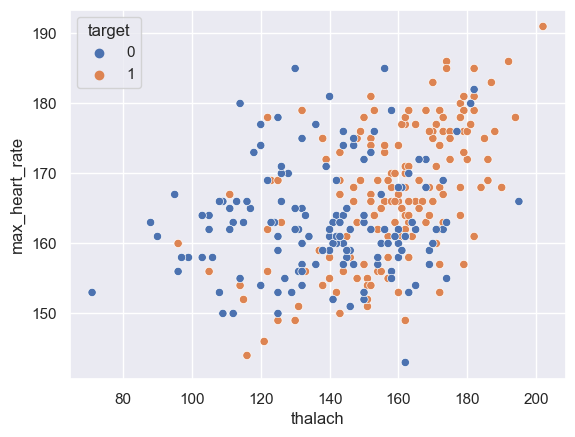

In [23]:
sns.scatterplot(data=df, x='thalach',y='max_heart_rate',hue=df.target)
plt.show()

Secara umum sebaran data penderita serangan jantung memiliki nilai `thalac` dan `max_heart_rate` yang tinggi dibanding yang tidak terkena serangan jantung. Dengan kata lain, serangan jantung banyak diderita oleh orang dengan degup jantung yang cepat.

In [24]:
# construct titles for plotting
titles = []
for i in range(len(num_col)):
    titles.append('Distribusi ' + num_col[i])

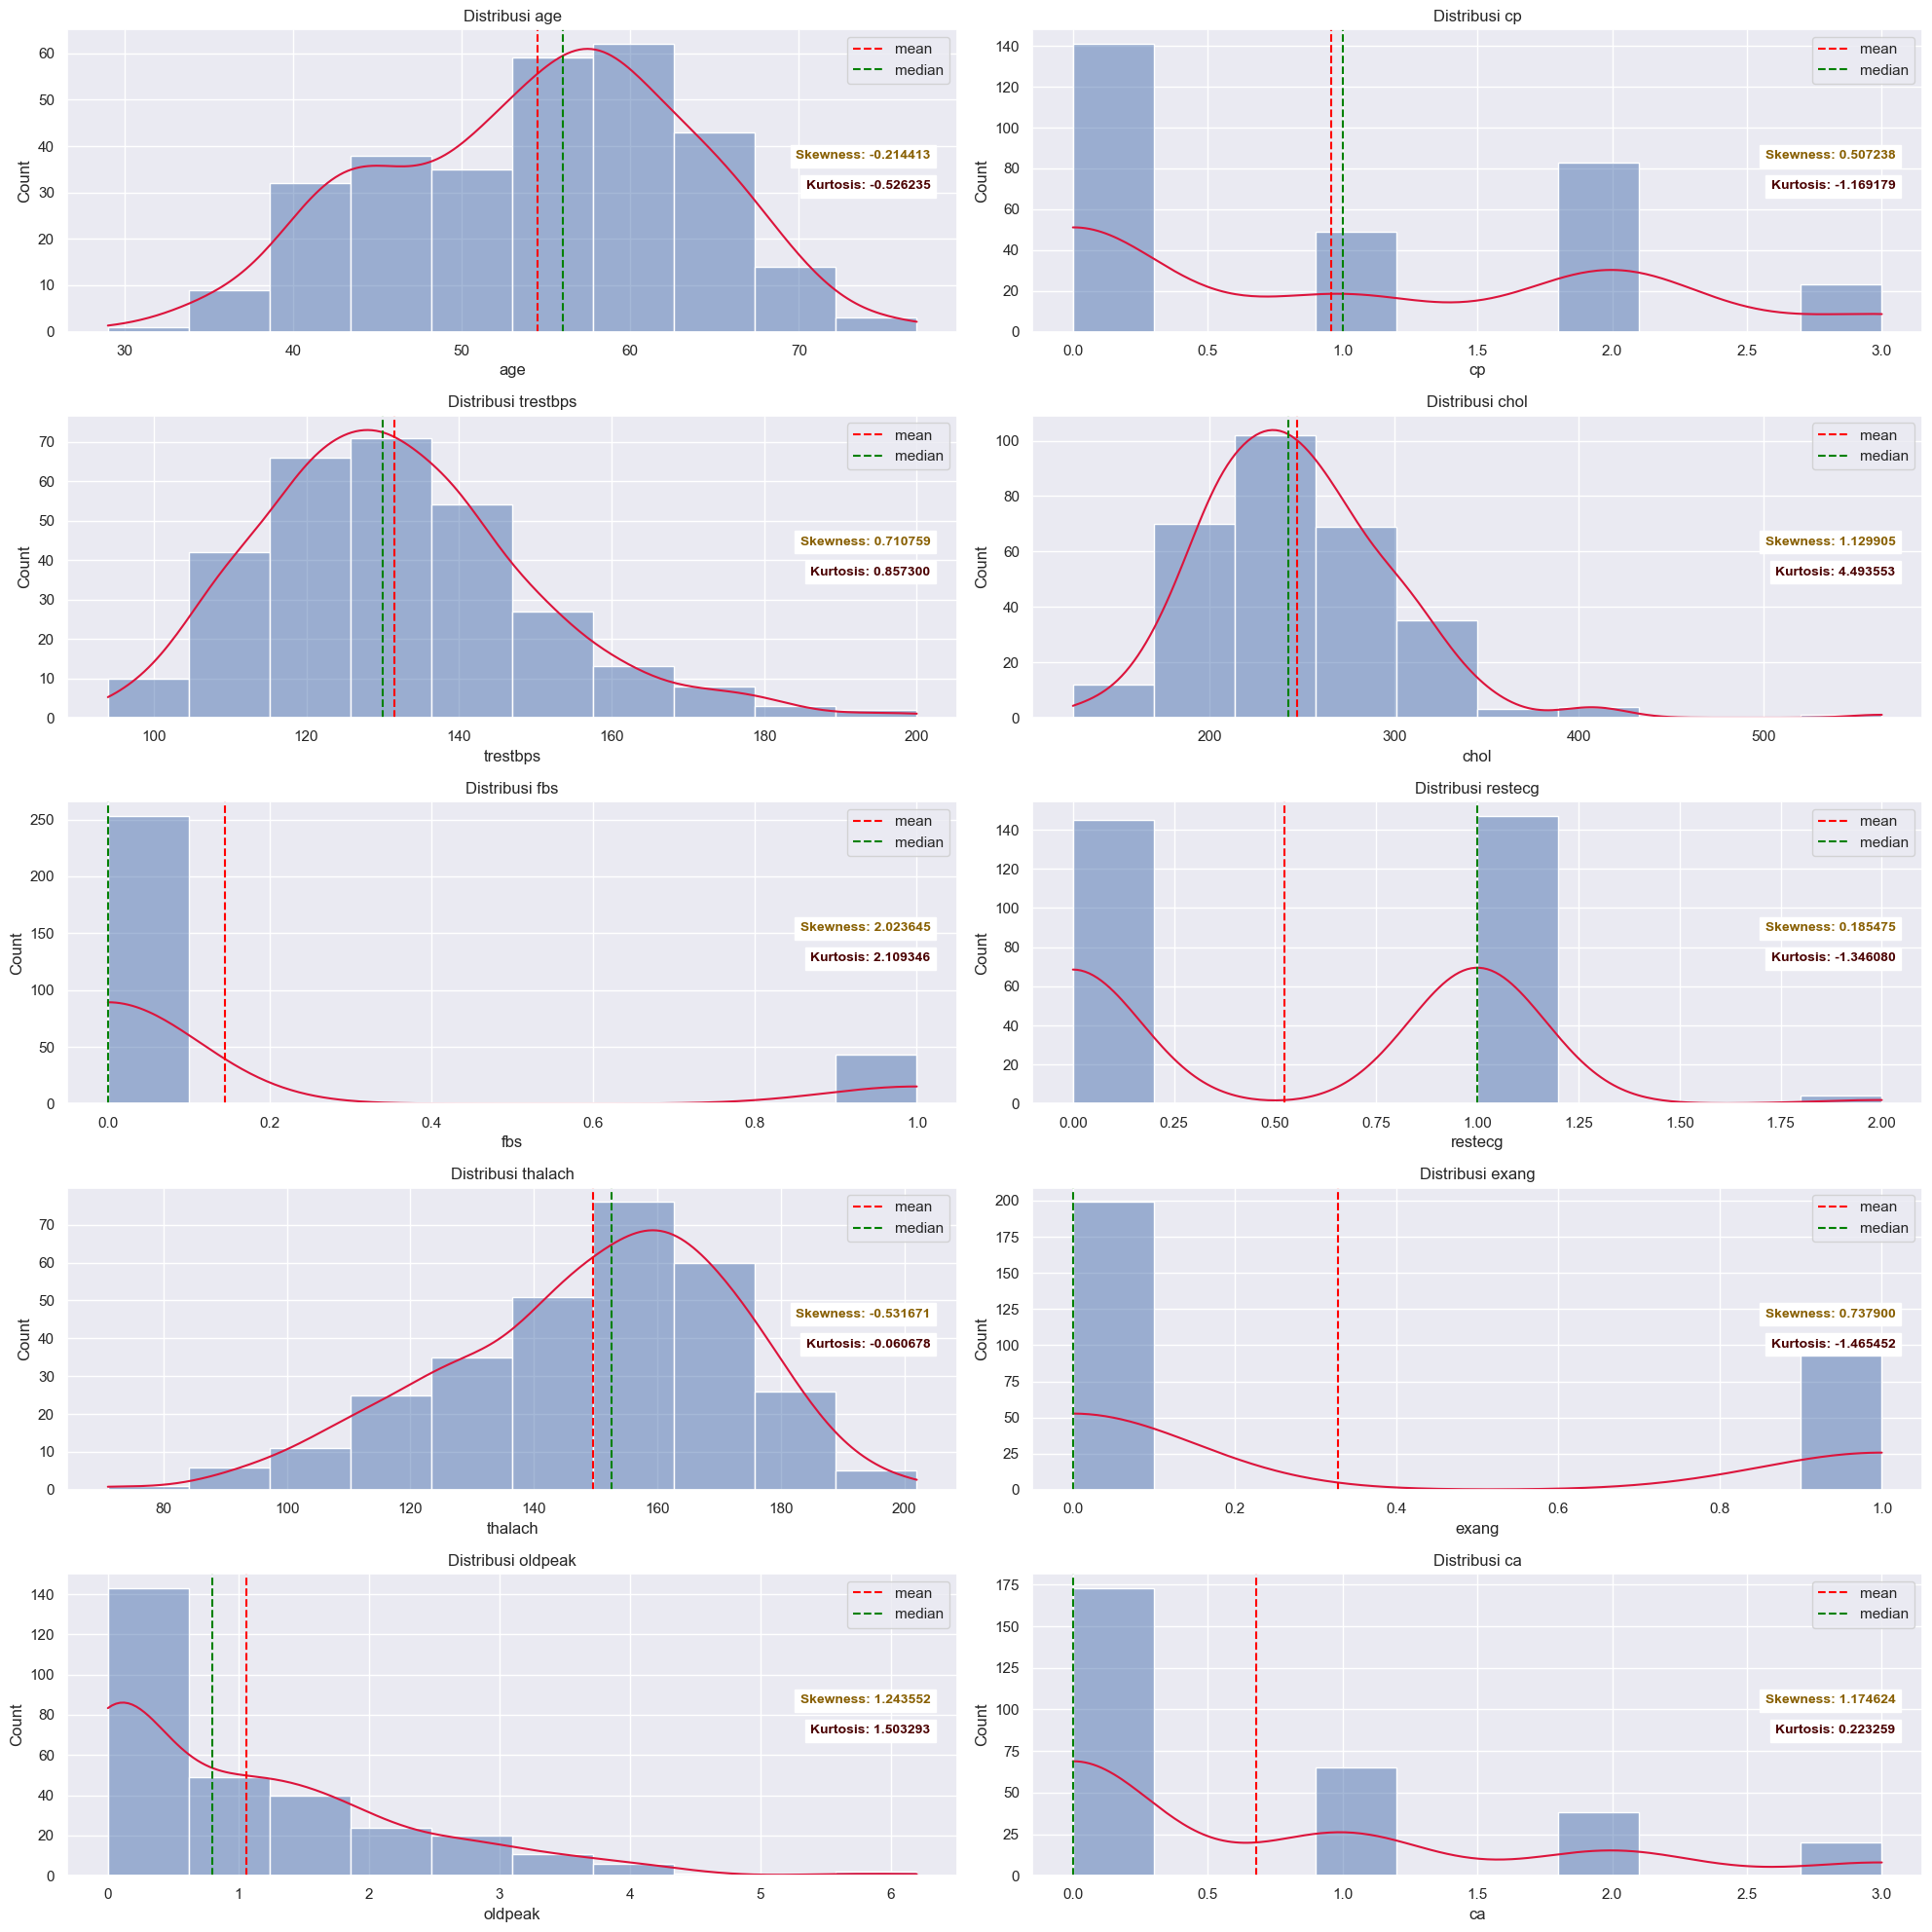

In [25]:
# plot distribusi kolom numerik
row_num=5
col_num=2
fig, axes= plt.subplots(row_num,col_num, figsize=(20,20))

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.8)
x=0
for i in range(row_num):
    for j in range(col_num):
        sns.histplot(ax=axes[i][j], data=df[num_col[x]], kde=True, bins=10)
        axes[i][j].set_title(titles[x])
        axes[i][j].lines[0].set_color('crimson')
        axes[i][j].axvline(df[num_col[x]].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
        axes[i][j].axvline(df[num_col[x]].median(), color = 'green', linestyle = 'dashed', label = 'median')
        axes[i][j].legend()
        axes[i][j].text(x=0.97, y=0.60, transform=axes[i][j].transAxes, s="Skewness: %f" % df[num_col[x]].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
        axes[i][j].text(x=0.97, y=0.50, transform=axes[i][j].transAxes, s="Kurtosis: %f" % df[num_col[x]].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
        x+=1
plt.tight_layout()

Kolom yang terdistribusi cenderung normal diantaranya: `age`, `cp`, `trestbps`, `restecg`, `thalach`, dan `exang` dan yang terdistribusi miring diantaranya: `chol`, `fbs`, `oldpeak`, dan `ca`.

## Feature Selection

### Phi_K Correlation Test

interval columns not set, guessing: ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'target', 'max_heart_rate']


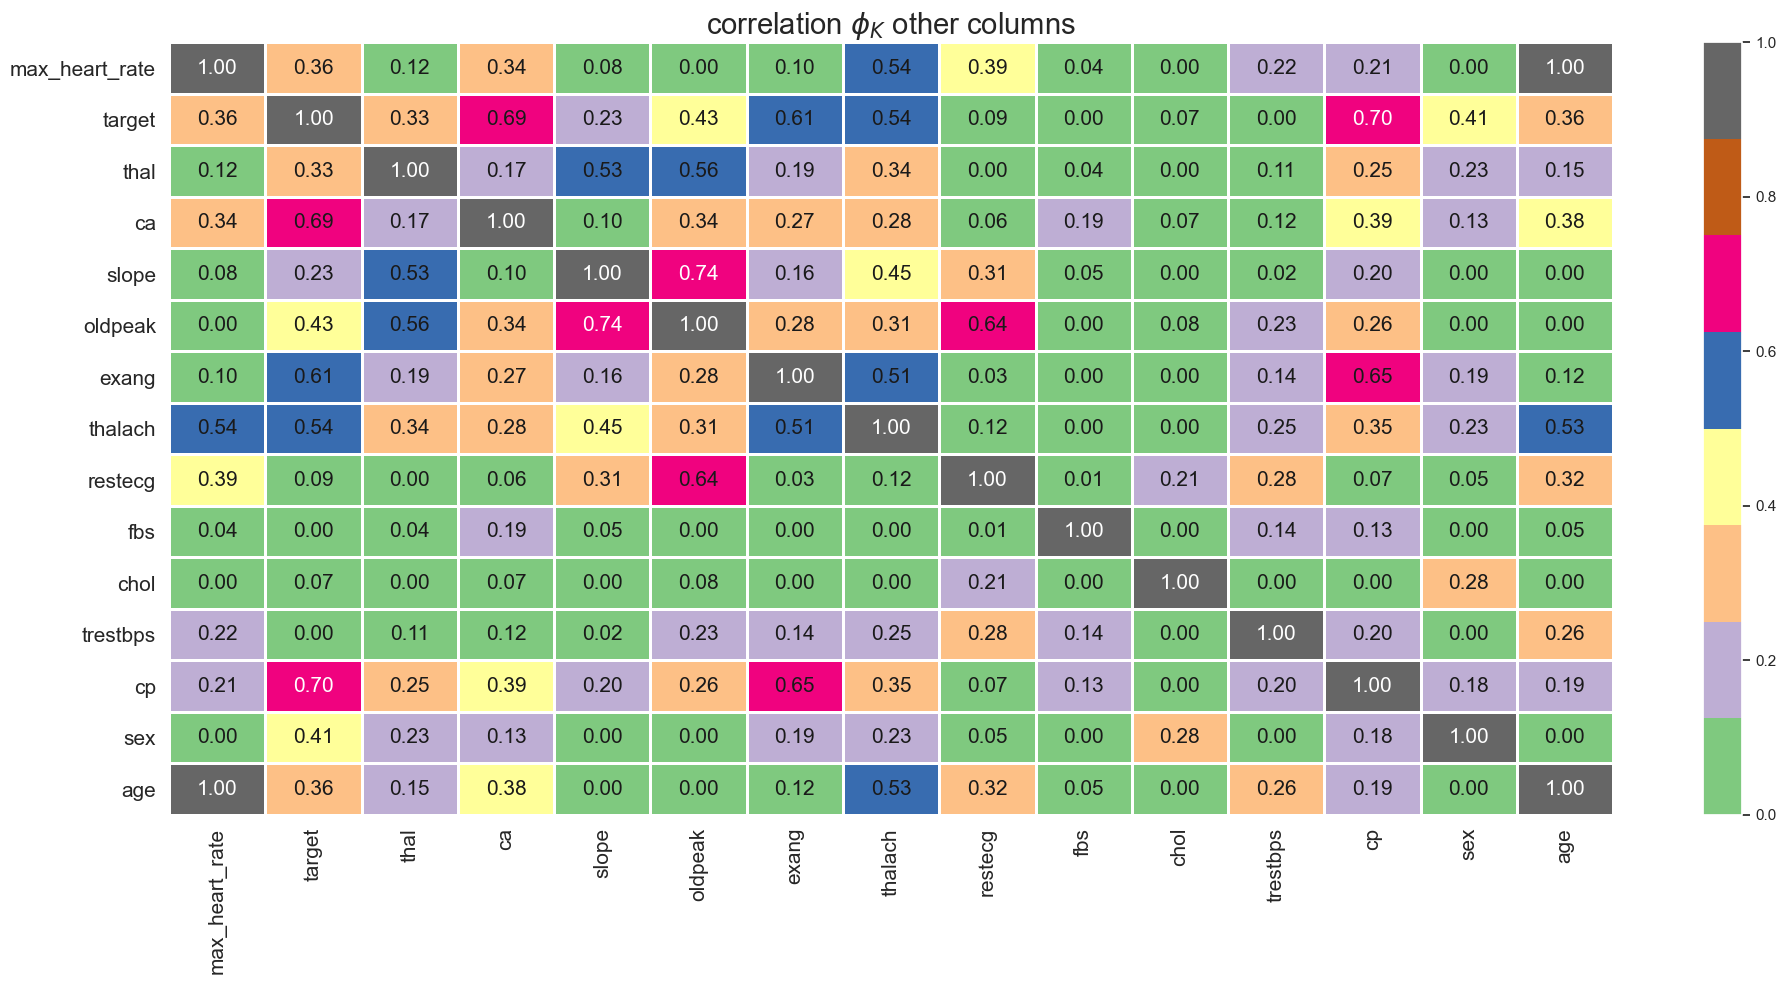

In [26]:
# get the phi_k correlation matrix between all variables
phik_matrix = df.phik_matrix()
plot_correlation_matrix(phik_matrix.values, 
                        x_labels=phik_matrix.columns, 
                        y_labels=phik_matrix.index, 
                        vmin=0, vmax=1, color_map="Accent", 
                        title=r"correlation $\phi_K$ other columns", 
                        fontsize_factor=1.5, 
                        figsize=(20,10))
plt.tight_layout()
# sns.heatmap(phik_matrix, annot= True, vmin=0, vmax=1, cmap='Accent', figsize=(12,8))

In [27]:
# cek korelasi yang memiliki signifikansi terhadap default_payment_next_month
df.phik_matrix().target.sort_values(ascending=False)

interval columns not set, guessing: ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'target', 'max_heart_rate']


target            1.000000
cp                0.704437
ca                0.692393
exang             0.606062
thalach           0.537084
oldpeak           0.434007
sex               0.414919
max_heart_rate    0.358510
age               0.356344
thal              0.328641
slope             0.232920
restecg           0.094888
chol              0.068812
trestbps          0.000000
fbs               0.000000
Name: target, dtype: float64

Tanpa mengikutsertakan `max_heart_rate`, dari metrik 𝜙 k (Phik) terlihat ada 9 fitur yang relatif signifikan berkorelasi dengan kolom target yaitu:
- `cp`, `ca`, `exang`, `thalac`, `oldpeak`, `sex`, `age`, `thal`, dan `slope` (dari tinggi ke rendah).

In [28]:
# menyimpan semua fitur dalam sebuah list
all_features = df.columns.tolist()

In [29]:
# drop fitur yang tidak signifikan
selected_features = []
dropped_features = ['max_heart_rate','restecg','chol','trestbps','fbs']
for i in all_features:
    if i not in dropped_features:
        selected_features.append(i)

In [30]:
# menampilkan selected features
selected_features

['age',
 'sex',
 'cp',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [31]:
# simpan df dengan fitur yang sudah diseleksi
df_selected = df[selected_features].copy()

In [32]:
#cek duplikat setelah feature selection
df_selected.duplicated().sum()

0

Tidak ada data duplikat setelah fitur dipilih.

In [33]:
# menampilkan final df dengan fitur yang sudah di seleksi
df_selected.head(3)

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,150,0,2.3,Downsloping,0.0,Fixed defect,1
1,37,Male,2,187,0,3.5,Downsloping,0.0,Normal,1
2,41,Female,1,172,0,1.4,Upsloping,0.0,Normal,1


# Data Preprocessing
## Train-Test Split

In [34]:
#split antara fitur dan target
X = df_selected.drop('target',axis=1)
y = df_selected['target']

In [35]:
#split antara train dan test dengan cara stratifikasi
X_train,X_test, y_train, y_test= train_test_split(X, y, stratify=y,test_size=0.2, random_state=42)
print(f'train size: {X_train.shape}')
print(f'test size: {X_test.shape}')

train size: (236, 9)
test size: (60, 9)


In [36]:
# menampilkan 5 data fitur teratas
X_train.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal
60,71,Female,2,130,0,0.0,Upsloping,1.0,Normal
276,58,Male,0,105,0,2.0,Flat,1.0,Reversible defect
204,62,Female,0,145,0,6.2,Downsloping,3.0,Reversible defect
275,52,Male,0,168,0,1.0,Upsloping,2.0,Reversible defect
38,65,Female,2,148,0,0.8,Upsloping,0.0,Normal


In [37]:
# fitur numerikal baik yang sudah dalam bentuk encode maupun belum
num_col = X_train.columns[X_train.dtypes!='object'].to_list()
num_col

['age', 'cp', 'thalach', 'exang', 'oldpeak', 'ca']

In [38]:
# fitur numerikal yang perlu di scaling
scaled_num_col = ['age','thalach']
scaled_num_col

['age', 'thalach']

In [39]:
df.thal.unique()

array(['Fixed defect', 'Normal', 'Reversible defect'], dtype=object)

In [40]:
# fitur categorical yang masih perlu di encode
cat_col = X_train.columns[X_train.dtypes=='object'].to_list()
cat_col

['sex', 'slope', 'thal']

In [41]:
ord_cat_col = ['sex']
ohe_cat_col = ['slope','thal']

## Outlier Handling
Penulis akan melakukan outlier handling terhadap fitur numerikal yang bukan berasal dari kategorical yaitu `age` dan `thalac`

In [42]:
# fungsi untuk membuat histogram dan boxplot dari suatu fitur
def plot_diagnostic(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=10)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1], whis=1.5)
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' is normally distributed".format(col))
    elif df[col].skew() > 0.5 and df[col].skew() <= 1 :
        print("Columns '{}' is moderately right skewed".format(col))
    elif df[col].skew() > 1:
        print("Columns '{}' is highly right skewed".format(col))
    elif df[col].skew() < -0.5 and df[col].skew() >= -1 :
        print("Columns '{}' is moderately left skewed".format(col))
    elif df[col].skew() < -1:
        print("Columns '{}' is highly left skewed".format(col))

In [43]:
# fungsi untuk mendapatkan upper dan lower boundary dari suatu distribusi
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

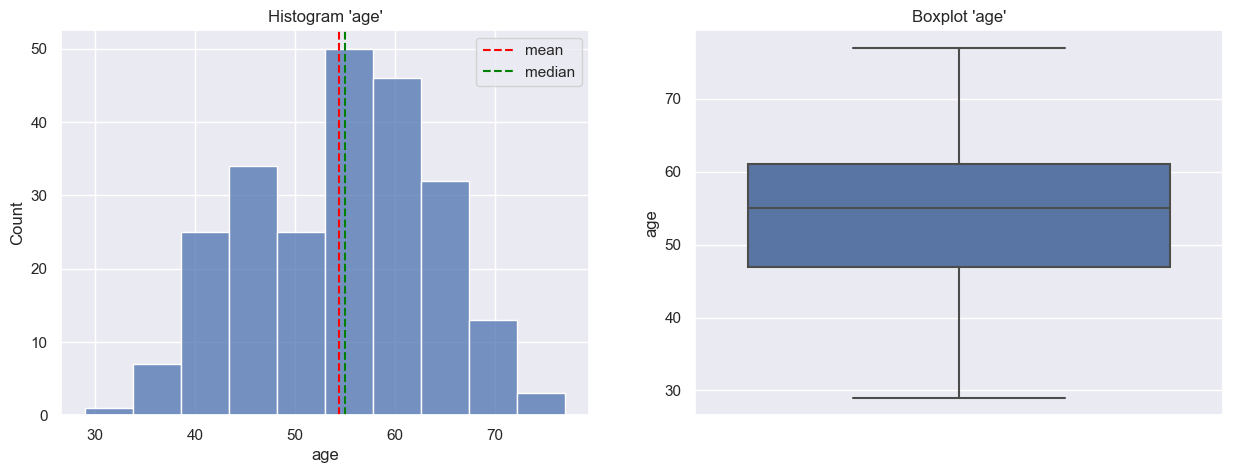

age Kurtosis: -0.5128973883893844
age Skewness: -0.13803053172891339
Columns 'age' is normally distributed


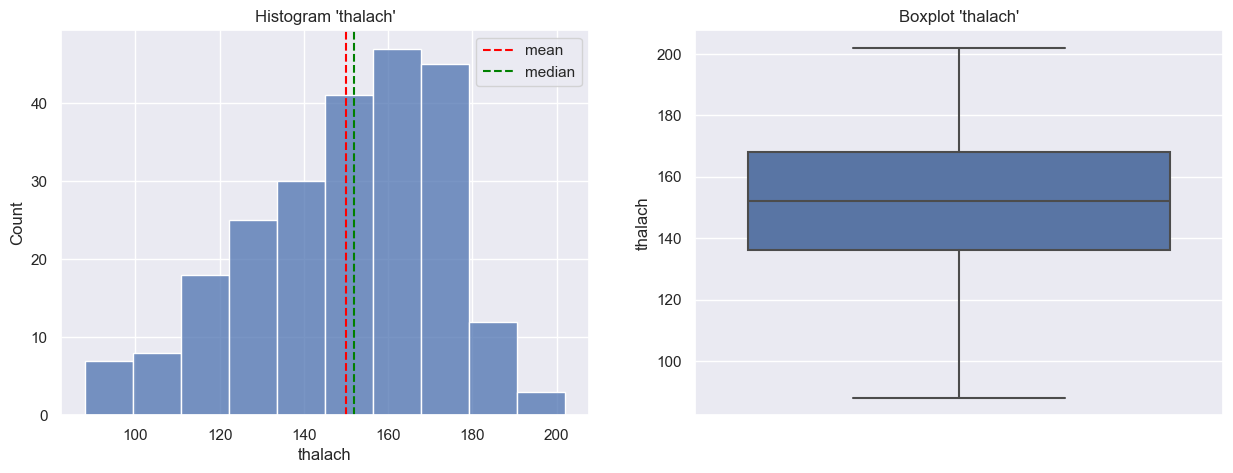

thalach Kurtosis: -0.2697313711980627
thalach Skewness: -0.4999453744932425
Columns 'thalach' is normally distributed


In [44]:
# plot semua fitur pada data train untuk melihat distribusi sekaligus outliernya
for i in range(len(scaled_num_col)):
    plot_diagnostic(X_train, scaled_num_col[i])

Tidak ada outlier pada kedua fitur `age` dan `thalach` sebagaimana fitur tersebut terdistribusi secara normal, maka outlier handling tidak dilakukan.

## Pipelining
### Scaling & Encoding
- Untuk scaling, penulis akan melakukan scaling pada fitur `age` dan `thalach` dimana fitur ini adalah murni fitur numerikal yang bukan berasal dari fitur categorical dalam *`encoded form`*. Dengan pertimbangan kedua distribusi fitur adalah normal, maka penulis akan menggunakan *`standard scaler`* daripada *`minmax scaler`*. 
- Penulis akan melakukan encoding pada fitur `sex`, `slope`, dan `thal` dengan *`One-Hot Encoding`*. 
- Penulis akan membungkus fungsi scaling ini kedalam column transformer dengan variabel bernama *`preprocessor`*

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

#mendefinisikan kolom/fitur numerik yang akan di transform
scaled_num_features = scaled_num_col
num_transformer = StandardScaler()

#mendefinisikan kolom/fitur kategorikal yang akan di transform
ohe_cat_features = ohe_cat_col
ohe_transformer = OneHotEncoder()

#
ord_cat_features = ord_cat_col
ord_transformer = OrdinalEncoder()


# membuat pipeline data preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, scaled_num_features),
        ("ohe", ohe_transformer, ohe_cat_features),
        ("ord", ord_transformer, ord_cat_features),
    ],
    remainder='passthrough'
)

### Model Definition
Model yang akan digunakan adalah: `Decision Tree` dan `Random Forest`. Penulis akan melakukan training data pada semua model terlebih dahulu dengan parameter default menggunakan *`cross validation`*. Kemudian kedua model akan dipilih dan dilakukan `hyperparameter tuning`, dan terakhir `mengevaluasi` performa `sebelum` dan `sesudah` melakukan tuning pada model tersebut.

In [46]:
# instansiasi classifier dengan default parameter
tree_model = DecisionTreeClassifier()
rnd_model = RandomForestClassifier(random_state=42)

### Dengan Pipeline Preprocessor
Berikut adalah pipeline untuk setiap classifier

In [47]:
# contruct data training pipeline (preprocessing + model fitting)
tree_clf = Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("estimator",tree_model)
    ]
)
rnd_clf = Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("estimator",rnd_model)
    ]
)

## Model Training
Train data dengan pipeline: preprocessor + estimator.

In [48]:
#set metric
metric = 'recall'
n_split = 5

In [49]:
# train data pada model decision tree
tree_clf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'thalach']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['slope', 'thal']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['sex'])])),
                ('estimator', DecisionTreeClassifier())])

In [50]:
# train data pada model decision tree
rnd_clf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'thalach']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['slope', 'thal']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['sex'])])),
                ('estimator', RandomForestClassifier(random_state=42))])

In [51]:
# predict test set dengan model decision tree
y_pred_train_tree = tree_clf.predict(X_train)
# predict test set dengan model decision tree
y_pred_train_rf = rnd_clf.predict(X_train)

In [52]:
# predict test set dengan model decision tree
y_pred_test_tree = tree_clf.predict(X_test)
# predict test set dengan model decision tree
y_pred_test_rf = rnd_clf.predict(X_test)

## Model Evaluation
Dengan pertimbangan meminimalisir angka *`False Negative`*, penulis menggunakan metric *`recall`* dimana dengan konteks prediksi serangan jantung, penulis lebih menekankan pada pasien yang seharusnya diprediksi terkena serangan jantung (*`target 1=True 0=False`*).

In [53]:
cv = 5
# checking cross validation score
cv_tree_model = cross_val_score(tree_clf, X_train, y_train, cv=cv, scoring=metric)
cv_rnd_model = cross_val_score(rnd_clf, X_train, y_train, cv=cv, scoring=metric)


name_model = []
cv_scores=0
for cv,name in zip([cv_tree_model,cv_rnd_model],['tree_model','rnd_model']):
    print(name)
    print(f'{metric} - All - Cross Validation  : ', cv)
    print(f'{metric} - Mean - Cross Validation : ', cv.mean())
    print(f'{metric} - Std - Cross Validation  : ', cv.std())
    print(f'{metric} - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass

tree_model
recall - All - Cross Validation  :  [0.80769231 0.76923077 0.73076923 0.68       0.84      ]
recall - Mean - Cross Validation :  0.7655384615384616
recall - Std - Cross Validation  :  0.05632198221363814
recall - Range of Test-Set       :  0.7092164793248235 - 0.8218604437520998
--------------------------------------------------
rnd_model
recall - All - Cross Validation  :  [0.84615385 0.73076923 0.76923077 0.84       1.        ]
recall - Mean - Cross Validation :  0.8372307692307693
recall - Std - Cross Validation  :  0.09223792235044449
recall - Range of Test-Set       :  0.7449928468803249 - 0.9294686915812138
--------------------------------------------------


In [54]:
# print recall score atau metrik yang meminimalisir false negative
recall_tree = recall_score(y_train,y_pred_train_tree,pos_label=1,average='binary')
print(f'Decision Tree Model Recall Score train-set: {recall_tree}')

# print recall score atau metrik yang meminimalisir false negative
recall_rf = recall_score(y_train,y_pred_train_rf,pos_label=1,average='binary')
print(f'Random Forest Model Recall Score train-set: {recall_rf}')

Decision Tree Model Recall Score train-set: 1.0
Random Forest Model Recall Score train-set: 1.0


In [55]:
# print recall score atau metrik yang meminimalisir false negative
recall_tree = recall_score(y_test,y_pred_test_tree,pos_label=1,average='binary')
print(f'Decision Tree Model Recall Score test-set: {recall_tree}')

# print recall score atau metrik yang meminimalisir false negative
recall_rf = recall_score(y_test,y_pred_test_rf,pos_label=1,average='binary')
print(f'Random Forest Model Recall Score test-set: {recall_rf}')

Decision Tree Model Recall Score test-set: 0.71875
Random Forest Model Recall Score test-set: 0.84375


Hasil evaluasi dengan default parameter menunjukkan bahwa model *`Decision Tree`* dan *`Random Forest`* mencapai angka recall sebesar `0.625` dan `0.6875`.

## Model Hyperparameter Tuning
Dari model yang sudah ditrain, penulis akan melakukan tuning hyperparameter terhadap kedua model tersebut menggunakan *`GridSearchCV`* untuk memaksimalkan metrik guna mendapatkan model yang optimal.

In [56]:
# parameter decision tree
param_grid_tree = {
    'estimator__criterion': ['gini', 'entropy', 'log_loss'],
    'estimator__splitter': ['best','random'],
    'estimator__max_depth':[1,2,3,4,5,6,7,8]
    }

# parameter random forest
param_grid_rf = {
    'estimator__n_estimators': [100,150,200],
    'estimator__criterion': ['gini', 'entropy', 'log_loss'],
    'estimator__max_depth':[1,2,3],
    'estimator__min_samples_split':[2,3,4],
    'estimator__min_samples_leaf':[1,2,3,4],
    }

In [57]:
# pipeline pada grid search tidak digunakan karena preprocessor tidak dipakai
grid_tree = GridSearchCV(tree_clf, param_grid=param_grid_tree, cv=n_split, scoring=metric,n_jobs=-1)
grid_tree.fit(X_train, y_train)
print(f"Best cross-validation {metric}: {grid_tree.best_score_:.2f}")
print(f"Test set score: {grid_tree.score(X_test, y_test):.2f}")
print(f"Best parameters: {grid_tree.best_params_}")

Best cross-validation recall: 0.88
Test set score: 0.75
Best parameters: {'estimator__criterion': 'gini', 'estimator__max_depth': 3, 'estimator__splitter': 'random'}


Pada model decision tree terdapat peningkatan nilai recall dari `0.625` menjadi `0.75` dengan hyperparameter yang tertera diatas.

In [60]:
# pipeline pada grid search tidak digunakan karena preprocessor tidak dipakai
grid_rf = GridSearchCV(rnd_clf, param_grid=param_grid_rf, cv=n_split, scoring=metric,n_jobs=-1)
grid_rf.fit(X_train, y_train)
print(f"Best cross-validation {metric}: {grid_rf.best_score_:.2f}")
print(f"Train set score: {grid_rf.score(X_train, y_train):.2f}")
print(f"Test set score: {grid_rf.score(X_test, y_test):.2f}")
print(f"Best parameters: {grid_rf.best_params_}")

Best cross-validation recall: 0.88
Train set score: 0.95
Test set score: 0.84
Best parameters: {'estimator__criterion': 'entropy', 'estimator__max_depth': 3, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 200}


Pada model random forest terdapat peningkatan nilai recall dari `0.6875` menjadi `0.75` dengan hyperparameter yang tertera diatas.

# Model Saving

In [59]:
# save model
with open('model_tree.pkl','wb') as file_1:
    joblib.dump(tree_clf,file_1)

with open('best_parameter.txt','wb') as file_2:
    joblib.dump({'estimator__criterion': 'gini', 'estimator__max_depth': 2, 'estimator__splitter': 'random'},file_2)

with open('scaled_num_col.txt','wb') as file_3:
    joblib.dump(scaled_num_col,file_3)

with open('encoded_cat_col.txt','wb') as file_4:
    joblib.dump(cat_col,file_4)

# Conclusion
- Teknik Decision Tree dan Random Forest dapat digunakan untuk prediksi klasifikasi
- Data Preprocessing merupakan hal yang wajib dilakukan sebelum data di feed ke dalam model
- Penentuan hyperparameter pada model memengaruhi kualitas hasil model tersebut
- Metrik recall cocok digunakan untuk konteks data yang memiliki urgensi untuk menekan angka false negative.
- Terdapat peningkatan performa recall setelah dilakukannnya hyperparameter tuning dari sekitar 0.6 menjadi 0.75.

# Further Improvement
- Perlunya hyperparameter tuning lebih lanjut untuk membuat model yang lebih baik